# Coursework Output 2
*Instructions*: In this coursework, you will show your domain of the data related Python skills required for business analytics. To do so, you will use packages such as *pandas* and *matplotlib*.

## Importing and Visualising a Business Case in Python
Each student will be assigned a different dataset in a different format. The goal is to import the dataset into Python so that you can wrangle and visualise the data in better ways. This will allow you to get your own conclusions and start building up knowledge regarding on how you could potentially learn from data to predict or classify future instances.

You must create a program which allows you to select the following options:
1. Import your dataset into Python as a Pandas data frame.
2. Query and print an instance of the dataset (by row number or by row name).
3. Create a "reduced" dataset (with less columns) by indicating a list of columns to bring upon this newly created dataset.
4. Randomly split the original or the reduced dataset into two substes called *training* and *testing* according to a ratio specified by the user.
5. Visualise a dataset by means of a scatterplot which relates two variables/columns specified by the user. The plot has to show the $x$ and $y$ axis labels and use the *target/class* column (i.e. the last one) as the colour variable.
6. Exit the program.

## Additional Considerations
* The program has to check that every input option added by the user is valid.
* No option can be executed until option 1 is executed first.
* Whenever a dataset or subdataset is imported or created, print it for the user to visually inspect it.
* In option 2, the row to query can be specified either using the row number or the row name.
* In option 3, the list of columns has to be specified by column name.
* Option 5 can receive as input either the original dataset or the training/testing ones (if these have been already created).


## Submission Instructions

* Once that you have finished your program, run all cells and run the main program cell using the sequence of options 0(wrong option)-2(has to fail)-1-2(by row index)-2(by row name)-3-4-5-6 (option 0 is purposely created to verify that your program can handle the error). 
* Then, without clearing the kernel, generate a html **OR** pdf file from the Jupyter notebook. 
* Name both the Jupyter notebook and the html/pdf file with your id number and submit them to the corresponding Moodle's dropbox before **12th December, 2019**.

In [1]:
## Use this cell to import all necessary packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import sys

In [2]:
## Use this cell to define the function corresponding to OPTION 1
def option1():
    '''With this function you import the dataset.'''
    dataset = pd.read_csv('iris.csv')
    print('The dataset has been imported!')
    print(dataset)
    return dataset

# dataset = option1()

In [3]:
## Use this cell to define the function corresponding to OPTION 2

def option2(dataset):
    '''This function queries and prints an instance of the dataset.'''
    ans = True
    while ans:
        print('Select 1 to query by row number or 2 to query by row name:')
        ans = input('>> ')
        if ans=='1' or ans =='2':
            if ans=='1':
                ans2 = True
                while ans2:
                    print('Select the row number to query (indexes start in 0):')
                    ans2 = input('>> ')
                    if int(ans2)<=len(dataset)-1:
                        print(dataset.iloc[int(ans2)])
                        ans2 = False
                    else:
                        print('The index number is unvalid. Please try again.')
            else:
                ans2 = True
                while ans2:
                    print('Select the row index to query:')
                    ans2 = input('>> ')
                    if ans2 in dataset.index:
                        print(dataset.loc[ans2])
                        ans2 = False
                    else:
                        print('The index name is unvalid. Please try again.')
            ans = False
        else:
            print('Wrong option. Please try again.')
    return

#option2(dataset)

In [4]:
## Use this cell to define the function corresponding to OPTION 3

def option3(dataset):
    '''This function creates a new dataset by indicating which columns to include.'''
    columnstoinclude=[]
    ans = True
    while ans:
        print('Indicate a column to include:')
        print(list(dataset.columns))
        ans = input('>> ')
        if ans in dataset.columns and ans not in columnstoinclude:
            columnstoinclude.append(ans)
            print('Do you want to indicate another column? (Y/N)')
            ans2 = True
            while ans2:
                ans2 = input('>> ')
                if ans2.lower()=='y':
                    ans2=False
                elif ans2.lower()=='n':
                    ans2=False
                    ans=False
                else:
                    print('Wrong option. Please try again.')            
        else:
            print('The column indicated does not exit or has already been indicated. Please try again.')
    if columnstoinclude:
        dataset_reduced = dataset[columnstoinclude]
        print('Showing the reduced dataset...')
        print(dataset_reduced)
    return dataset_reduced

#dataset_reduced = option3(dataset)

In [5]:
## Use this cell to define the function corresponding to OPTION 4

def option4(dataset, dataset_reduced):
    '''This function randomly splits the original or the reduced dataset into train and test.'''
    print('Select 1 to use the original dataset or 2 to use the reduced dataset:')
    ans = True
    while ans:
        select = input('>> ')
        if select == '1':
            ans = False
        elif select == '2':
            if type(dataset_reduced) is not list and len(dataset_reduced)!=0:
                ans = False
            else:
                print('There is no reduced dataset. Please select option 1.')
        else:
            print('Wrong option. Please try again.')
    ans = True
    while ans:
        print('Indicate the percentage of the dataset to assign as test data (between 0 and 1):')
        ans = input('>> ')
        if 0<float(ans)<1:
            if select == '1':
                train, test = train_test_split(dataset, test_size=float(ans))
            else:
                train, test = train_test_split(dataset_reduced, test_size=float(ans))
            print('Showing training data...')
            print(train)
            print('Showing testing data...')
            print(test)
            ans = False
        else:
            print('Wrong input. Please try again.')
    return train, test

# train, test = option4(dataset, dataset_reduced)

In [6]:
## Use this cell to define the function corresponding to OPTION 5

def option5(dataset,train,test):
    '''This function visualises the dataset using a scatterplot.'''
    print('Select 1 to use the original dataset, 2 to use the training dataset or 3 to use the test dataset:')
    ans = True
    while ans:
        select = input('>> ')
        if select == '1':
            vis = dataset
            ans = False
        elif select == '2':
            if type(train) is not list and len(train)!=0:
                ans = False
                vis = train
            else:
                print('There is no training/testing dataset. Please select option 1.')
        elif select == '3':
            if type(test) is not list and len(test)!=0:
                ans = False
                vis = test
            else:
                print('There is no training/testing dataset. Please select option 1.')
        else:
            print('Wrong option. Please try again.')
    ans = True
    while ans:
        print('Select the variable to use as x axis:')
        print(list(dataset.columns))
        ans = input('>> ')
        if ans in dataset.columns:
            x_axis = ans
            ans = False
        else:
            print('The column does not exist. Please try again.')
    ans = True
    while ans:
        print('Select the variable to use as y axis:')
        print(list(dataset.columns))
        ans = input('>> ')
        if ans in dataset.columns:
            y_axis = ans
            ans = False
        else:
            print('The column does not exist. Please try again.')
    
    colours = np.array(vis['variety'])
    colours=np.where(colours=='Setosa', 0, colours)
    colours=np.where(colours=='Versicolor', 1, colours)
    colours=np.where(colours=='Virginica', 2, colours)
    plt.scatter(vis[x_axis], vis[y_axis], c=colours)
    plt.xlabel(x_axis)
    plt.ylabel(y_axis)
    plt.show()
    
    return

# option5(dataset, train, test)

Welcome to Carlos Moreno-Garcia 1813072 business case.
Select and option
>> 0
Error, try again
Select and option
>> 2
The first option to be selected shall be 1. Please try again
Select and option
>> 1
The dataset has been imported!
     sepal.length  sepal.width  petal.length  petal.width    variety
0             5.1          3.5           1.4          0.2     Setosa
1             4.9          3.0           1.4          0.2     Setosa
2             4.7          3.2           1.3          0.2     Setosa
3             4.6          3.1           1.5          0.2     Setosa
4             5.0          3.6           1.4          0.2     Setosa
5             5.4          3.9           1.7          0.4     Setosa
6             4.6          3.4           1.4          0.3     Setosa
7             5.0          3.4           1.5          0.2     Setosa
8             4.4          2.9           1.4          0.2     Setosa
9             4.9          3.1           1.5          0.1     Setosa
10      

>> 5
Select 1 to use the original dataset, 2 to use the training dataset or 3 to use the test dataset:
>> 3
Select the variable to use as x axis:
['sepal.length', 'sepal.width', 'petal.length', 'petal.width', 'variety']
>> petal.length
Select the variable to use as y axis:
['sepal.length', 'sepal.width', 'petal.length', 'petal.width', 'variety']
>> petal.width


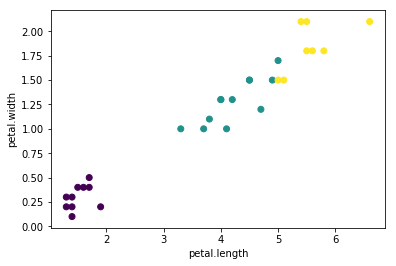

Select and option
>> 6


SystemExit: 

C:\ProgramData\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2870: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [7]:
## Use this cell to create the "main" part of your program
print('Welcome to Carlos Moreno-Garcia 1813072 business case.')
dataset = []
dataset_reduced = []
train = []
test = []
prev_options=[]
valid_options = ['1','2','3','4','5','6']
ans = True
while ans:
    print('Select and option')
    ans = input('>> ')
    if ans in valid_options:
        if ans !='1' and '1' not in prev_options:
            print('The first option to be selected shall be 1. Please try again')
            ans = True
        elif ans == '1':
            prev_options.append(ans)
            dataset = option1()
            ans = True
        elif ans == '2':
            prev_options.append(ans)
            option2(dataset)
            ans = True
        elif ans == '3':
            prev_options.append(ans)
            dataset_reduced = option3(dataset)
            ans = True
        elif ans == '4':
            prev_options.append(ans)
            train, test = option4(dataset, dataset_reduced)
            ans = True
        elif ans == '5':
            prev_options.append(ans)
            option5(dataset, train, test)
            ans = True
        else:
            sys.exit()
    else:
        print('Error, try again')
        ans = True

## Questions
Please answer the following questions to appraise your level of engagement with the content of the course. Use the Markdown cell corresponding to each question to write your answers.

1. Using any of the two continuous variables of your dataset, show an example of how a linear regression (implemented using an existing Python module) could be applied on the training data to predict the values of one column of the test data. Discuss if there is any metric that can be used to decide which two variables are most correlated.

**ANSWER:** Students are encouraged to implement a code (as below) which allows them to test different X,Y combinations to find a suitable combination that show some level of correlation. Moreover, they can investigate concepts such as $R^2$ and *mean square error*, which are useful to see the level of correlation between two variables.

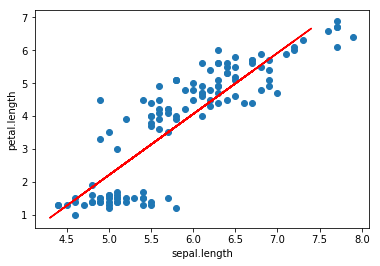

In [17]:
# Use this cell to implement linear regression.
import numpy as np
import matplotlib.pyplot as plt  # To visualize
import pandas as pd  # To read data
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

data_x = 0
data_y = 2

dataset = pd.read_csv('iris.csv')
train, test = train_test_split(dataset, test_size=0.2)
X = train.iloc[:, data_x].values.reshape(-1, 1)  # values converts it into a numpy array
Y = train.iloc[:, data_y].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
X_pred = test.iloc[:, data_x].values.reshape(-1, 1)  # values converts it into a numpy array
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X_pred)  # make predictions

plt.scatter(X, Y)
plt.plot(X_pred, Y_pred, color='red')
plt.xlabel(dataset.columns[data_x])
plt.ylabel(dataset.columns[data_y])
plt.show()

2. Using any clustering method available in literature and in a Python module (e.g. hierarchical, k-means), briefly describe the selected method and implement it to classify the data of the original dataset into clusters. How would you verify how accurate is your clustering algorithm with respect to the original dataset target/class?

**ANSWER:** For this question, students will be encouraged to review scientific sources to explain how a clustering method works, then they can use an existing Python module to implement such method in their dataset. To verify the validity of the solution they may propose a simple comparison between elements or an existing module.

In [27]:
# Use this cell to implement clustering.

## Clustering data using K-means
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np

dataset = pd.read_csv('iris.csv')
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=1, max_iter=300, 
                tol=0.0001, precompute_distances='auto', random_state = 0,
                n_jobs=1, algorithm='auto').fit(dataset[dataset.columns[:-1]])
target_kmeans = kmeans.labels_
print('The data is classified in the following clusters', target_kmeans)

## Verifying the accuracy
target = dataset['variety']
target=np.where(target=='Setosa', 0, target)
target=np.where(target=='Versicolor', 2, target)
target=np.where(target=='Virginica', 1, target)
comparison = target_kmeans == target
print('The comparison between target and clusters is: ', comparison)
print('Setosa', comparison[:50],'Accuracy', sum(comparison[:50])/len(comparison[:50]))
print('Versicolor', comparison[50:100],'Accuracy', sum(comparison[50:100])/len(comparison[50:100]))
print('Virginica', comparison[100:],'Accuracy', sum(comparison[100:])/len(comparison[100:]))

The data is classified in the following clusters [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 2 1 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]
The comparison between target and clusters is:  [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True False  True False  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True False  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True 